<a href="https://colab.research.google.com/github/jayaraksha/ML/blob/main/scenario1(ex%3A2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("sohier/calcofi")

print("Path to dataset files:", path)

# List contents of the downloaded directory
print("Contents of the downloaded directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

100%|██████████| 50.4M/50.4M [00:00<00:00, 168MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sohier/calcofi/versions/2
Contents of the downloaded directory:
/root/.cache/kagglehub/datasets/sohier/calcofi/versions/2/bottle.csv
/root/.cache/kagglehub/datasets/sohier/calcofi/versions/2/cast.csv


Now that we have the path and the files listed, we need to identify the main CSV file to load. Assuming there's a primary CSV file, I will attempt to load the first one found that looks like data.

In [4]:
# Assuming the main data file is 'bottle.csv' based on typical Kaggle datasets in this domain
# If this is incorrect, please specify the correct CSV file name from the output above

df = pd.read_csv(os.path.join(path, 'bottle.csv'))

# Display the first 5 rows of the DataFrame
display(df.head())

/tmp/ipython-input-1215570777.py:4: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'bottle.csv'))


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.shape)
df.info()


(864863, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_pr

In [7]:
print(df.columns)


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [10]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'


In [14]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

data = df[features + [target]]
data.head()

,Depthm,Salnty,O2ml_L,T_degC
0,0,33.440,NaN,10.50
1,8,33.440,NaN,10.46
2,10,33.437,NaN,10.46
3,19,33.420,NaN,10.45
4,20,33.421,NaN,10.45


In [15]:
imputer = SimpleImputer(strategy='mean')

data_imputed = pd.DataFrame(
    imputer.fit_transform(data),
    columns=data.columns
)

data_imputed.isnull().sum()


,0
Depthm,0
Salnty,0
O2ml_L,0
T_degC,0


In [16]:
X = data_imputed[features]
y = data_imputed[target]


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = lr_model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 6.2214468826180624
Root Mean Squared Error (RMSE): 2.4942828393384064
R² Score: 0.6492792001567064


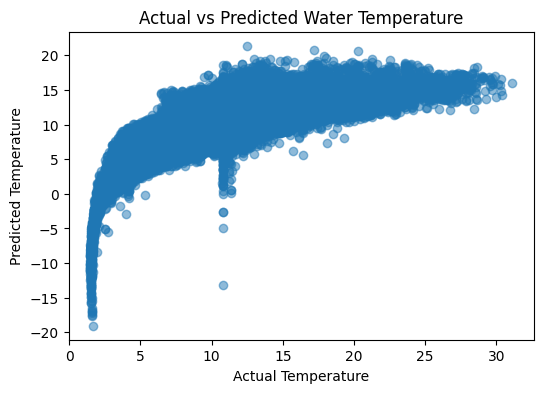

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Water Temperature")
plt.show()


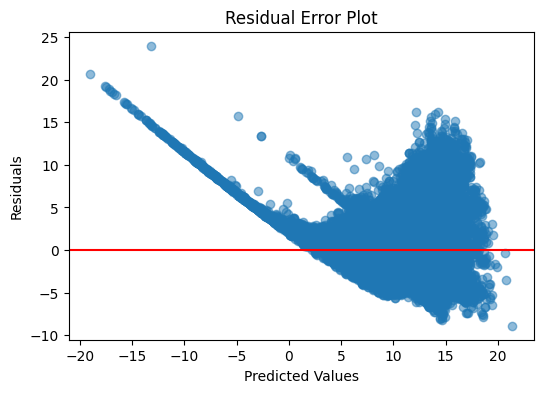

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Error Plot")
plt.show()


In [24]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
print("Ridge R² Score:", r2_score(y_test, ridge_pred))


Ridge R² Score: 0.649279200458081


In [25]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
print("Lasso R² Score:", r2_score(y_test, lasso_pred))


Lasso R² Score: 0.6492263454624063
